# Data Visualization

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocess_functions import load_data_relevant_cols
import seaborn as sns
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt

## Exploring trends in terrorism

It seemed useful 

In [112]:
raw = load_data_relevant_cols();

/Users/yakubakhmerov/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning:

Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,61,62,63,64,73,76,79,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/yakubakhmerov/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning:

Columns (6,61,62,63,79,94,96,114,115) have mixed types. Specify dtype option on import or set low_memory=False.



In [59]:
def get_num_attacks_tuples(attribute, min_number_attacks = 0):
    '''
    Input: 
    attribute: A string corresponding to an attribute we are interested in, 
    such as region or weapon type.
    min_number_attacks: A cutoff point for the minimum number of attacks. 
    Any category with fewer attacks will not be returned.
    
    Output: A list of tuples whose keys are the different values of attribute, 
    and values are the number of attacks in that category.
    '''
    attribute_vals = raw[attribute].unique()
    out = {}
    for val in attribute_vals: 
        df_subset = raw[raw[attribute] == val]
        num_attacks = len(df_subset)
        if (num_attacks >= min_number_attacks and val != 'Unknown'):
            out[val] = num_attacks
    return sorted(out.items(), key=lambda tup: (tup[1], tup[0]), reverse=True)

def plot_count_by_attribute(num_attacks_tuples, attribute, use_xticks = True):
    '''
    See get_num_attacks_tuples. 
    
    Input: 
    num_attacks_tuples: A list of tuples whose keys are the different values of attribute, 
    and values are the number of attacks in that category.
    attribute: A string corresponding to an attribute we are interested in, 
    such as region or weapon type.
    use_xticks: A boolean. The plot displays x_ticks if true.
    
    Output: A bar plot of number of attacks in the num_attacks_tuples, by key value. 
    '''
    plt.figure(figsize=(12, 6))

    y_pos = np.arange(len(num_attacks_tuples))
    plt.bar(y_pos, [x[1] for x in num_attacks_tuples], color='red')
    
    if use_xticks:
        plt.xticks(y_pos, [x[0] for x in num_attacks_tuples])
        plt.xticks(rotation=90)

    plt.ylabel('Number of Attacks')
    plt.title('Number of Terrorist Attacks by {}'.format(attribute))
    
    plt.show();

In [224]:
raw.columns

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'success', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ransom', 'ransomamt'],
      dtype='object')

In [104]:
top_terror_groups = get_num_attacks_tuples('gname', min_number_attacks=500)
top_terror_groups

[('Taliban', 6575),
 ('Shining Path (SL)', 4551),
 ('Islamic State of Iraq and the Levant (ISIL)', 4287),
 ('Farabundo Marti National Liberation Front (FMLN)', 3351),
 ('Al-Shabaab', 2683),
 ('Irish Republican Army (IRA)', 2669),
 ('Revolutionary Armed Forces of Colombia (FARC)', 2481),
 ("New People's Army (NPA)", 2414),
 ("Kurdistan Workers' Party (PKK)", 2152),
 ('Boko Haram', 2077),
 ('Basque Fatherland and Freedom (ETA)', 2024),
 ('Communist Party of India - Maoist (CPI-Maoist)', 1766),
 ('Liberation Tigers of Tamil Eelam (LTTE)', 1606),
 ('National Liberation Army of Colombia (ELN)', 1483),
 ('Maoists', 1424),
 ('Tehrik-i-Taliban Pakistan (TTP)', 1252),
 ('Palestinians', 1124),
 ('Al-Qaida in the Arabian Peninsula (AQAP)', 975),
 ('Nicaraguan Democratic Force (FDN)', 895),
 ('Houthi extremists (Ansar Allah)', 893),
 ('Manuel Rodriguez Patriotic Front (FPMR)', 830),
 ('Sikh Extremists', 714),
 ('Corsican National Liberation Front (FLNC)', 639),
 ('Al-Qaida in Iraq', 636),
 ("Donet

In [6]:
#To understand trends in data, let's examine the levels of the data. 
attack_types = raw['attacktype1_txt'].unique()
for i in attack_types:
    print(i)

Assassination
Hostage Taking (Kidnapping)
Bombing/Explosion
Facility/Infrastructure Attack
Armed Assault
Hijacking
Unknown
Unarmed Assault
Hostage Taking (Barricade Incident)


## Group by attack types and year and examine trends

Next the count of attacks over years was done by group original data by the year and attack type. The result was a multi-indexed pandas dataframe with 2 levels of indexing, year and attack type. Multi-indexed data frames don't have the easiest properties to work with with. Fortunately, a pandas webpage provided assistance with that, the page is referenced in the code. 

In [132]:
raw.iyear = raw.iyear.astype('int')
raw
data = raw.groupby(['iyear', 'attacktype1_txt']).count()[['imonth']]
data = data.rename(columns=dict(imonth='count'))
data.head() #Multi-indexed dataframe, one index being the year, the other being the attack type


count
iyear attacktype1_txt                      
1970  Armed Assault                      61
      Assassination                      22
      Bombing/Explosion                 333
      Facility/Infrastructure Attack    174
      Hijacking                          11

In [284]:
data.index.levels #the multi-indexed levels in new data frame

FrozenList([[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], ['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown']])

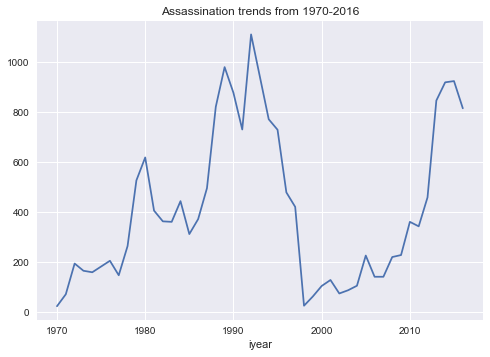

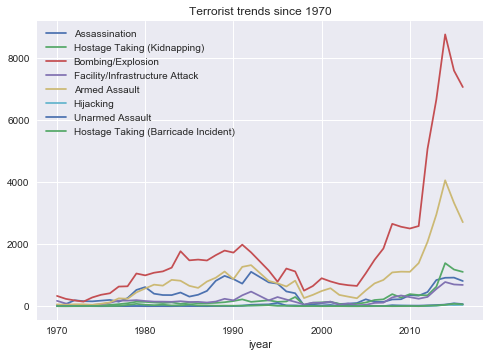

In [277]:
# Multi-indexed reference: https://pandas.pydata.org/pandas-docs/stable/advanced.html
assassinations = data.xs('Assassination', level=1)
assassinations['count'].plot();
plt.title("Assassination trends from 1970-2016");
plt.show()
a= "Assassination"
b="Hostage Taking (Kidnapping)"
c="Bombing/Explosion"
d="Facility/Infrastructure Attack"
e="Armed Assault"
f="Hijacking"
g="Unarmed Assault"
h="Hostage Taking (Barricade Incident)"
attack_vec = (a,b,c,d,e,f,g,h)
for i in attack_vec:
    a=data.xs(i, level=1);
    a['count'].plot(label=i);
plt.legend();
plt.title('Terrorist trends since 1970');
plt.show()


Much of the data is pretty constant throughout time. However, bombing/explosion and armed assault have seen massive spikes in the last 10 or so years.

## Interesting thing to note in comparing plots

In the first plot, the spikes in assassination are relatively large compared to one another. However, when plotted against the other attacks, in the second plot, the rise in bombings is so massive that it dwarfs assassinations in comparison. This shows just how much of the terrorists attacks are done with bombings.

In [279]:
#plt.scatter(data=a, x=a.index, y = 'count', c = a.index, s=(10*a['count']))

In [282]:
#plt.plot(assassinations.index, assassinations['count'], marker = 'o', mfc='r')

In [14]:
data.index.levels

FrozenList([[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], ['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown']])

## Plotting coordinates

The next part of the analysis dealt with using coordinates to show high levels of terrorist activity

## Plotting Terrorist attack through countries

Due to having GPS coordinates for the terrorist attack, a visual representation of the attacks would be fitting. A few actions had to be taken to get the data in a format nice enough to plot:
1. From a previous notebook, we found the top 5 terrorist groups responsible for the most groups. We wanted the data visualization to reflect this information.
2. A helper function was made "group_to_color" to map the colors of the terrorists groups. 
3. creating a function to plot the data. Basemap and matplot lib were used.
4. The creation of the plots was then done, A plot of the world, the United States of America, Iraq, Afghanistan, and Pakistan to show the various levels of terrorist activity in these various parts of the world.

In [256]:
a = set(raw['gname'].unique())
print("The total amount of unique terrorists groups is " + str(len(a))+".")

The total amount of unique terrorists groups is 3454.


In [258]:
def group_to_color(group_name): 
    '''Helper function to map the top 5 terrorist group to a color'''
    if group_name == 'Taliban':
        return 'red'
    elif group_name == 'Shining Path (SL)':
        return 'orange'
    elif group_name == 'Islamic State of Iraq and the Levant (ISIL)': 
        return 'yellow'
    elif group_name == 'Farabundo Marti National Liberation Front (FMLN)':
        return 'cyan'
    elif group_name == 'Al-Shabaab':
        return 'purple'
    else: 
        return 'green'
import matplotlib.patches as mpatches    
#Create assignments of colors to prepare for legend plotting
a1 = mpatches.Patch(color='red', label='Taliban')
a2 = mpatches.Patch(color='orange', label='Shining Path (SL)')
a3 = mpatches.Patch(color='yellow', label='Islamic State of Iraq and the Levant (ISIL)')
a4 = mpatches.Patch(color='cyan', label='Farabundo Marti National Liberation Front (FMLN)')
a5 = mpatches.Patch(color='purple', label='Al-Shabaab')
a6 = mpatches.Patch(color='green', label='Other Groups')
    
raw['gname'].apply(group_to_color).unique() #testing unique values of data.

array(['green', 'orange', 'cyan', 'red', 'purple', 'yellow'], dtype=object)

2.3839738941261785

In [254]:
def plot_terrorism(data, region, llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat, lat_0, lon_0):
    '''
    Inputs: 
    data: A pandas data frame containing data on terrorist attacks.
    region: A string specifying region. Examples are country, global, or continent.
    llcrnrlon: For Basemap plotting, the lower left longitude coordinate of region specified.
    llcrnrlat: For Basemap plotting, the lower left latitude coordiante of region specified.
    urcrnrlon: For Basemap plotting, the upper right longitude coordinate of region specified
    urcrnrlat: For Basemap plotting, the upper right latitude coordinate of region specified.
    lat_0: For Basemap plotting, center latitude coordinate of region specified.
    lon_0: For Basemap plotting, center logitude coordinate of region specified.
    Output: 
    Basemap with terrorist attack scattered over the specified region.
    '''
    color_list = []
    if region == 'Global':
        country_data = data.loc[data['country_txt'] != 'NaN']
        title = "the world 1970-2016"
    elif region == "South America":
        country_data = data.loc[data['region_txt'] == 'South America']
        title = "South America 1970-2016"
    else:
        title = region + " 1970-2016"
        country_data = data.loc[data['country_txt'] == country]
    for i in range(len(country_data)): 
        color_list.append(group_to_color(country_data.iloc[i]['gname']))
    f, ax = plt.subplots(1,1, figsize=(16,9))
    m = Basemap(llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat, lat_0, lon_0) 
    
    plt.scatter(country_data['longitude'], country_data['latitude'], c = color_list, s = 5)
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    plt.legend(handles=[a1,a2,a3,a4,a5,a6],title='Terrorist Groups')
    plt.title('Terrorist Attacks in ' + title)
    


In [208]:
country = "United States"
country_data = raw.loc[raw['country_txt'] == country]
color_list = []
for i in range(len(country_data)): 
    color_list.append(group_to_color(country_data.iloc[i]['gname']))
set(color_list)

{'green'}

## Global look at terrorist attacks

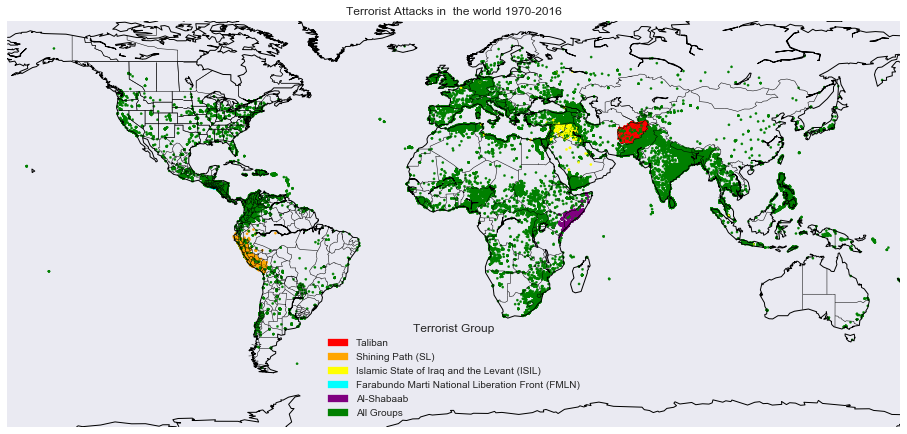

In [210]:
plot_terrorism(raw,'Global', llcrnrlon=-165, llcrnrlat=-75, urcrnrlon=165, urcrnrlat=75, lat_0 = 0, lon_0=0)

We can see just how much of the world has been affected by terrorism. There are about 3450 different terrorists groups. With them being in various parts of the world. Let's have a looka at some specific regions.

### United States
The primary terrorist groups in the U.S. are other groups. Though much of the media has an influence on the type of attacks in the U.S., per our data, the top 5 worst terrorist groups weren't reponsible for those attacks in our time period.

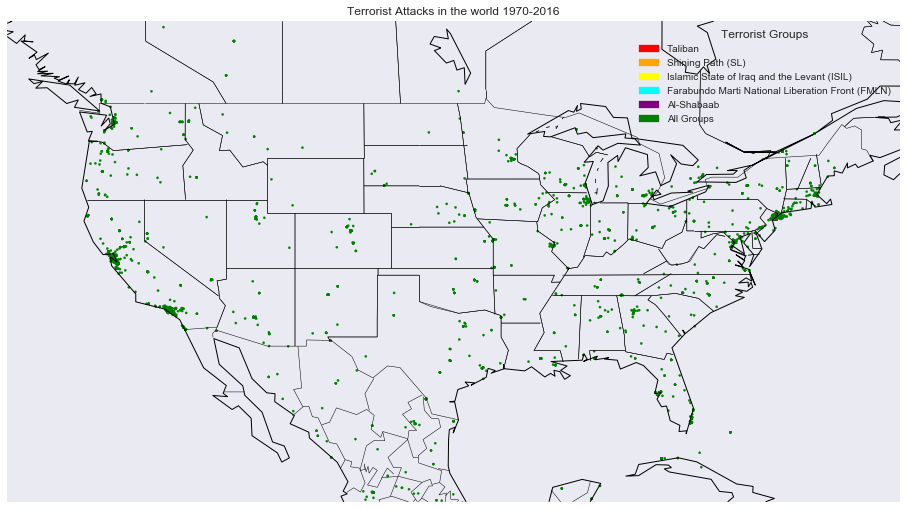

In [257]:
plot_terrorism(raw, 'Global', llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-65, urcrnrlat=55, lat_0 = 39, lon_0=98.5)

The U.S. doesn't have much variety in the top terrorists groups.

In [253]:
print("Percentage of attacks in Iraq by ISIL is " + 
     str(len(raw[raw['gname']=='Islamic State of Iraq and the Levant (ISIL)'])/len(raw[raw['country_txt'] == 'Iraq'])) + ".")

Percentage of attacks in Iraq by ISIL is 0.19371893357433348.


### Iraq
By the plots, Iraq has a mix of other groups and a very high amount of ISIL activity. In fact by the above calculaton, 19.3 of the terrorists attack committed here were by ISIL. 


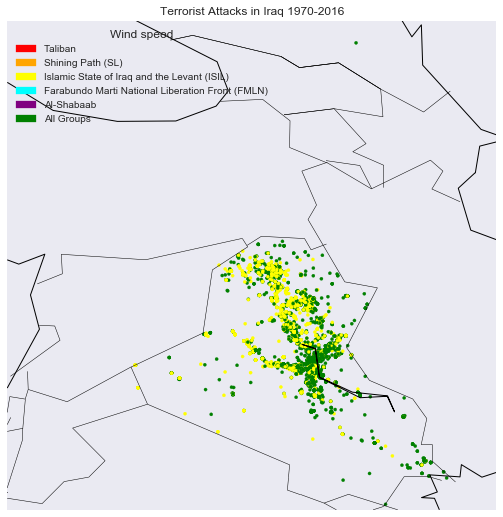

In [202]:
plot_terrorism(raw, 'Iraq', llcrnrlon=35, llcrnrlat=29, urcrnrlon=50, urcrnrlat=44, lat_0 = 33.2232, lon_0=43.6793)

### Afghanistan
Afghanistan had a very high red presence in our global mapping data. The taliban was responsible for an alarming 58% of the terrorist attacks in Afghanistan.

In [252]:
print("Percentage of attacks in Afghanistan by the Taliban is " + 
     str(len(raw[raw['gname']=='Taliban'])/len(raw[raw['country_txt'] == 'Afghanistan'])) + ".")

Percentage of attacks in Afghanistan by the Taliban is 0.5815496196709712.


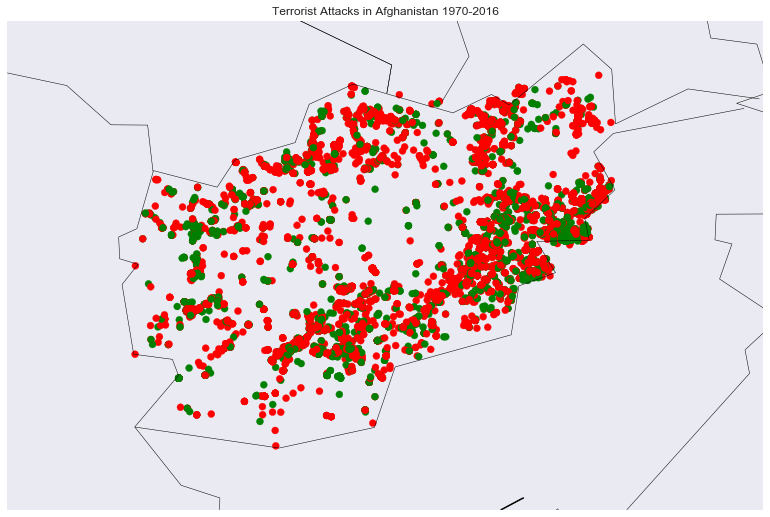

In [188]:
plot_terrorism(raw, 'Afghanistan', llcrnrlon=58, llcrnrlat=28, urcrnrlon=75, urcrnrlat=39, lat_0 = 33.9391, lon_0=67.7100)

### South America
Another intriguing region, there's some activity from our global map that there is quite a bit of diversity in this region. The Shining Path seemed to have a significant presence here

In [250]:
print("Percentage of attacks in South America by Shining Path(SL) is " + 
     str(len(raw[raw['gname']=='Shining Path (SL)'])/len(raw[raw['region_txt']=='South America'])) + ".")

Percentage of attacks in South America by Shining Path(SL) is 0.2425647585545251.


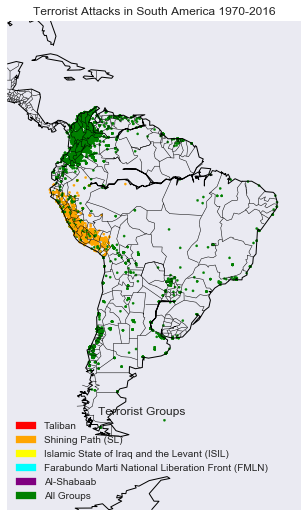

In [242]:
plot_terrorism(raw, 'South America', llcrnrlon=-90, llcrnrlat=-70, urcrnrlon=-30, urcrnrlat=30, lat_0 = 10, lon_0=55.49)

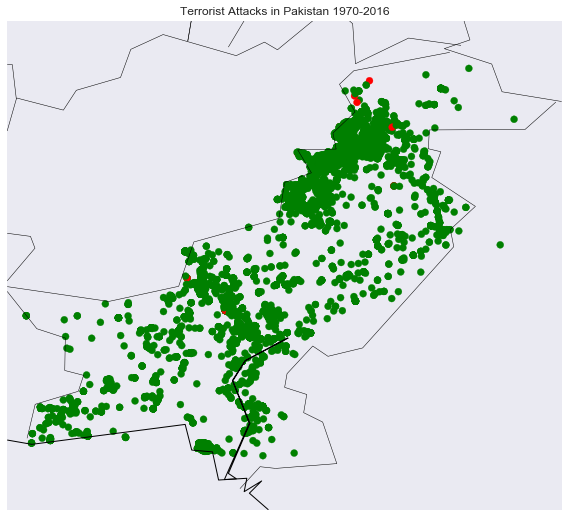

In [189]:
plot_terrorism(raw, 'Pakistan', llcrnrlon=61, llcrnrlat=23, urcrnrlon=78, urcrnrlat=38, lat_0 = 30.3753, lon_0=69.3451)

## Conclusion
The processing of the data was a good learning process in the learning of data struture

The results were telling. 
Terrorist trends have risen in the the last 10-15 years with an increase in bombings and aggrevated assault. The GPS data showed a large concentration in specific areas. The most surprising value was that the taliban had done nearly 60% of the terrorist work in Aghanistan.